In [1]:
#!/usr/bin/python3
import pandas as pd
import os
import nltk
import string
import re
import warnings
import numpy as np
from matplotlib import reload
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
import Error
reload(Error)

<module 'Error' from 'U:\\JIRA\\Code\\Error.py'>

In [2]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

def replace_strings(data,name):
    for i in range(len(data)):
        if(data[name].iloc[i].find(',')!=-1):
            data[name].iloc[i]=data[name].iloc[i].split(",")[-1]
    return data

def predict_category(s,train, model,names):
    pred = model.predict([s])
    return pred

In [110]:
#data = pd.read_excel("U:/JIRA/JIRAExport/sample.xls")
#test_data=data[data['Status']=='Submitted']
train_data=pd.read_excel("U:/JIRA/JIRAExport/train_data.xls")
train_data=train_data.dropna()
train_data=replace_strings(train_data,'Component/s')
#test_data=replace_strings(test_data,'Component/s')
#comp1=list(data['Component/s'].unique())
comp2=list(train_data['Component/s'].unique())

In [111]:
#comp=list(set().union(comp1,comp2))
Comp=[]
for each in comp2:
    if(each.find(',')!=-1):
        Comp.append(each.split(",")[-1])
    else:
        Comp.append(each)

In [112]:
train_data.head()

,Issue Key,Summary,Status,Created,Component/s,Description,Resolved Date
0,NCG3D-75861,CLONE - When a pohne without any music connect...,Closed,2017-11-14 12:11:20,SW_INFOTAINMENT,h4. Test Environment :\n* HW Sample : P32R\n* ...,2018-01-24 10:25:31
1,NCG3D-75863,Reset when system is kept idle,Closed,2017-11-14 12:38:12,SW_MANAPPS,h4. Test Environment :\n* HW Sample : \n* Devi...,2017-11-15 07:12:04
2,NCG3D-75864,Several resets during 35 km drive,Closed,2017-11-14 12:48:53,SW_Resets,h4. Test Environment :\n* HW Sample : *dual li...,2017-11-14 14:02:45
4,NCG3D-75867,"After reaching the destination, the navi conti...",Closed,2017-11-14 13:14:17,SW_NAVIGATION,h4. Test Environment :\n* SW: 0734\n* HW Sampl...,2017-11-22 11:12:34
5,NCG3D-75765,"Map icons (compass, zoom scale and map menu) i...",Closed,2017-11-14 06:58:13,SW_NAVIGATION_JPN,h4. Test Environment :\n* HW Sample : Nissan P...,2017-12-07 12:31:42


In [128]:
d=[]
for i in range(len(train_data)):
    for j in range(len(less)):
        if (train_data.iloc[i]['Component/s']==less.iloc[j]['Component/s']):
            d.append(train_data.iloc[i])

In [138]:
#y = train_data.pop('Component/s')
x=train_data.groupby('Component/s').Summary.count()
x=pd.DataFrame(x)
less=x[x['Summary']<2]
less['Component/s']=less.index
len(train_data)

82592

In [140]:
train_data=(pd.concat([train_data,pd.DataFrame(d)]).drop_duplicates(keep=False))

In [141]:
Comp=comp2
#train_data['Component/s']=train_data['Component/s'].replace(Comp,range(len(Comp)))
#test_data['Component/s']=test_data['Component/s'].replace(Comp,range(len(Comp)))
warnings.filterwarnings("ignore")
X=train_data['Summary']

In [143]:
y = train_data.pop('Component/s')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42, stratify=y)

In [145]:
#test=test_data.sample(frac=0.2, replace=True)
X_test.head()


71100    Scope2: 20170213_118_003: The screens is not i...
68249                        NAVIGATION : Popup adaptation
15348    Set Auto. Show Turn List on Freeway to ON > si...
59240    [P-IVI Navigation] Destination: Five cities bu...
14512    AIVIBP-9787 [Degrade][Display] [Screen] is stu...
Name: Summary, dtype: object

In [146]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(57812, 29585)

In [147]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(57812, 29585)

In [149]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)
print(clf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [150]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)

In [152]:
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

0.4599023287726521

In [158]:
Error.err.class_err(y_test,predicted)

SW_AUDIO 0.06432748538011696
SW_NAVIGATION 0.9862097785206854
SW_PHONE 0.7780517879161529
SW_INFOTAINMENT 0.6743016759776537
SW_SMARTPHONE 0.6932624113475178
SW_SYSTEM 0.043424317617866005
SW_SPEECH 0.5244618395303327
SW_Resets 0.17766497461928935
SW_TELEMATIC 0.09937888198757763
SW_DIAGNOSTIC 0.41761363636363635
SW_WIFI 0.02857142857142857
SW_OTAS 0.0
SW_TUNER_TV 0.012048192771084338
SW_DRIVEASSIST 0.12375533428165007
SW_Unknown 0.0
SW_METER 0.09116022099447514
SW_FRAMEWORK_HMI 0.0
SW_TUNER_SXM 0.2668428005284016
SW_TUNER_AMFM 0.2829931972789116
SW_Base 0.016260162601626018
Mechanic 0.3811659192825112
SW_PARKASSIST 0.43578485181119647
Production-General 0.0
SW_NAVIGATION_JPN 0.02903225806451613
SW_SWUPDATE 0.08602150537634409
SW_SPM 0.008547008547008548
SW_HOME_MENU 0.01524390243902439
SW_PROFILE 0.005405405405405406
SW_GRAPHICS 0.0
TEST_FEP 0.0
SW_DATA 0.0
SW_TRANSLATIONS 0.0
SW_TUNER_HD 0.0
SW_Master_HMI 0.0
HW-General 0.1095890410958904
SW_MANAPPS 0.0
SW_SECURITY 0.0
TEST_ZTEST 0.0

In [159]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB(fit_prior=False))])

text_mnb_stemmed = text_mnb_stemmed.fit(X_train, y_train)

predicted_mnb_stemmed = text_mnb_stemmed.predict(X_test)

np.mean(predicted_mnb_stemmed == y_test)

0.617790692981394

In [161]:
Error.err.class_err(y_test,predicted_mnb_stemmed)

SW_AUDIO 0.26900584795321636
SW_NAVIGATION 0.9385708315921437
SW_PHONE 0.8088779284833539
SW_INFOTAINMENT 0.7793296089385475
SW_SMARTPHONE 0.8138297872340425
SW_SYSTEM 0.3349875930521092
SW_SPEECH 0.7162426614481409
SW_Resets 0.40609137055837563
SW_TELEMATIC 0.5046583850931677
SW_DIAGNOSTIC 0.7002840909090909
SW_WIFI 0.4530612244897959
SW_OTAS 0.3305785123966942
SW_TUNER_TV 0.3192771084337349
SW_DRIVEASSIST 0.5917496443812233
SW_Unknown 0.01639344262295082
SW_METER 0.3839779005524862
SW_FRAMEWORK_HMI 0.04129263913824058
SW_TUNER_SXM 0.6856010568031704
SW_TUNER_AMFM 0.6122448979591837
SW_Base 0.04878048780487805
Mechanic 0.8385650224215246
SW_PARKASSIST 0.7376509330406147
Production-General 0.05263157894736842
SW_NAVIGATION_JPN 0.20430107526881722
SW_SWUPDATE 0.6236559139784946
SW_SPM 0.17094017094017094
SW_HOME_MENU 0.2774390243902439
SW_PROFILE 0.2702702702702703
SW_GRAPHICS 0.0
TEST_FEP 0.26548672566371684
SW_DATA 0.02608695652173913
SW_TRANSLATIONS 0.07480314960629922
SW_TUNER_HD 0.

In [162]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)

In [17]:
print("Best Score",gs_clf.best_score_)
print("Best Parameters",gs_clf.best_params_)

Best Score 0.8096538549500222
Best Parameters {'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [163]:
text_clf_best = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=False)),('clf', MultinomialNB(alpha=0.01))])
text_clf_best = text_clf_best.fit(X_train, y_train)
predicted_best = text_clf_best.predict(X_test)
np.mean(predicted_best == y_test)

0.694071114339912

In [165]:
Error.err.class_err(y_test,predicted_best)

SW_AUDIO 0.41130604288499023
SW_NAVIGATION 0.9053489343919766
SW_PHONE 0.8220304151253597
SW_INFOTAINMENT 0.8
SW_SMARTPHONE 0.8156028368794326
SW_SYSTEM 0.5099255583126551
SW_SPEECH 0.7879973907371167
SW_Resets 0.5076142131979695
SW_TELEMATIC 0.6801242236024845
SW_DIAGNOSTIC 0.7741477272727273
SW_WIFI 0.5959183673469388
SW_OTAS 0.4462809917355372
SW_TUNER_TV 0.46987951807228917
SW_DRIVEASSIST 0.7339971550497866
SW_Unknown 0.03278688524590164
SW_METER 0.5662983425414365
SW_FRAMEWORK_HMI 0.12387791741472172
SW_TUNER_SXM 0.8044914134742405
SW_TUNER_AMFM 0.7020408163265306
SW_Base 0.12195121951219512
Mechanic 0.8968609865470852
SW_PARKASSIST 0.8002195389681669
Production-General 0.2631578947368421
SW_NAVIGATION_JPN 0.5301075268817205
SW_SWUPDATE 0.7876344086021505
SW_SPM 0.3333333333333333
SW_HOME_MENU 0.5442073170731707
SW_PROFILE 0.4594594594594595
SW_GRAPHICS 0.10476190476190476
TEST_FEP 0.5575221238938053
SW_DATA 0.30434782608695654
SW_TRANSLATIONS 0.2283464566929134
SW_TUNER_HD 0.4065

In [166]:
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

0.6511684223271582

In [21]:
Error.err.err(test['Component/s'],predicted_svm)

In [168]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_svm_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('svm', SGDClassifier())])

text_svm_stemmed = text_svm_stemmed.fit(X_train, y_train)

predicted_svm_stemmed = text_svm_stemmed.predict(X_test)

np.mean(predicted_svm_stemmed == y_test)

0.6862009121362554

In [171]:
Error.err.class_err(y_test,predicted_svm_stemmed)

SW_AUDIO 0.25925925925925924
SW_NAVIGATION 0.8984538236523193
SW_PHONE 0.8039457459926017
SW_INFOTAINMENT 0.7905027932960894
SW_SMARTPHONE 0.8362884160756501
SW_SYSTEM 0.40818858560794047
SW_SPEECH 0.8036529680365296
SW_Resets 0.3147208121827411
SW_TELEMATIC 0.7018633540372671
SW_DIAGNOSTIC 0.7542613636363636
SW_WIFI 0.8204081632653061
SW_OTAS 0.45454545454545453
SW_TUNER_TV 0.7228915662650602
SW_DRIVEASSIST 0.7738264580369844
SW_Unknown 0.01639344262295082
SW_METER 0.712707182320442
SW_FRAMEWORK_HMI 0.08976660682226212
SW_TUNER_SXM 0.869220607661823
SW_TUNER_AMFM 0.7238095238095238
SW_Base 0.14634146341463414
Mechanic 0.8565022421524664
SW_PARKASSIST 0.8397365532381997
Production-General 0.13157894736842105
SW_NAVIGATION_JPN 0.3139784946236559
SW_SWUPDATE 0.7983870967741935
SW_SPM 0.3076923076923077
SW_HOME_MENU 0.5289634146341463
SW_PROFILE 0.7243243243243244
SW_GRAPHICS 0.047619047619047616
TEST_FEP 0.37168141592920356
SW_DATA 0.034782608695652174
SW_TRANSLATIONS 0.1220472440944882


In [169]:
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)


print("Best Score",gs_clf_svm.best_score_)
print("Best Parameters",gs_clf_svm.best_params_)

Best Score 0.6704317442745451
Best Parameters {'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [174]:
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True)),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

0.673568228599104

In [175]:
Error.err.class_err(y_test,predicted_svm)

SW_AUDIO 0.2475633528265107
SW_NAVIGATION 0.928332636857501
SW_PHONE 0.8294286888614879
SW_INFOTAINMENT 0.78268156424581
SW_SMARTPHONE 0.83274231678487
SW_SYSTEM 0.40694789081885857
SW_SPEECH 0.7847358121330724
SW_Resets 0.3350253807106599
SW_TELEMATIC 0.6242236024844721
SW_DIAGNOSTIC 0.7386363636363636
SW_WIFI 0.7795918367346939
SW_OTAS 0.38016528925619836
SW_TUNER_TV 0.6204819277108434
SW_DRIVEASSIST 0.6998577524893315
SW_Unknown 0.01639344262295082
SW_METER 0.5497237569060773
SW_FRAMEWORK_HMI 0.0807899461400359
SW_TUNER_SXM 0.869220607661823
SW_TUNER_AMFM 0.7224489795918367
SW_Base 0.12195121951219512
Mechanic 0.8475336322869955
SW_PARKASSIST 0.845225027442371
Production-General 0.13157894736842105
SW_NAVIGATION_JPN 0.14623655913978495
SW_SWUPDATE 0.7956989247311828
SW_SPM 0.3418803418803419
SW_HOME_MENU 0.4527439024390244
SW_PROFILE 0.654054054054054
SW_GRAPHICS 0.09523809523809523
TEST_FEP 0.35398230088495575
SW_DATA 0.02608695652173913
SW_TRANSLATIONS 0.07480314960629922
SW_TUNER

In [207]:
test=pd.DataFrame()
test['Prediction_MNB']=predicted_mnb_stemmed
test['Prediction_svm']=predicted_svm
test['Prediction_mnb']=predicted_best
test['predicted_svm_stemmed']=predicted_svm_stemmed
test['Component/s']=np.array(y_test)

In [208]:
all_perfect=len(test[(test['Component/s']==test['Prediction_mnb' ] )&( test['Component/s']==test['Prediction_svm' ]) & ( test['Component/s']==test['Prediction_MNB' ])&( test['Component/s']==test['predicted_svm_stemmed' ])])
mod1=len(test[(test['Component/s']==test['Prediction_mnb' ])]) 
mod2=len(test[(test['Component/s']==test['Prediction_svm' ])]) 
mod3=len(test[(test['Component/s']==test['Prediction_MNB' ])]) 
mod4=len(test[(test['Component/s']==test['predicted_svm_stemmed' ])]) 
mod5=262
plot_data=np.array([all_perfect,mod1,mod2,mod3,mod4,mod5])
names=['All Correct','MNB','SVM','Stemmed MNB','SVM_Stemmed','LDA']

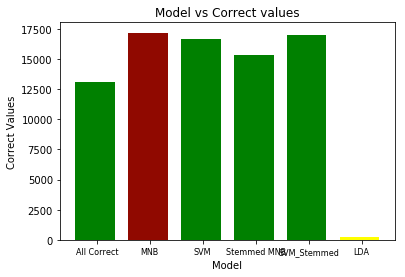

In [209]:
xticklabels = (names)
# Remove the single quotes, commas and enclosing square brackets
xtlabs = names

indices = np.arange(len(names))
width = 0.75
fig = plt.figure()
col=('green','#900900','green','green','green','yellow')
plt.title('Model vs Correct values')
plt.xlabel('Model')
plt.ylabel('Correct Values')
plt.bar(indices, plot_data, width,color=col)
plt.xticks(indices + width * 0.05, xtlabs, rotation='horizontal', fontsize=8)

plt.savefig('Model_Correct.png')
plt.show()


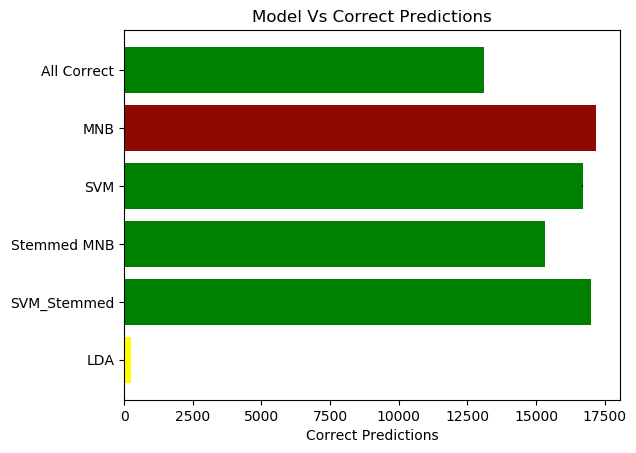

In [210]:

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = names
y_pos = np.arange(len(people))
performance = plot_data
error = np.random.rand(len(people))
col=('green','#900900','green','green','green','yellow')
ax.barh(y_pos, performance, xerr=error, align='center',
        color=col, ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correct Predictions')
ax.set_title('Model Vs Correct Predictions')
plt.show()

In [211]:
plot_data

array([13089, 17197, 16689, 15307, 17002,   262])

In [32]:
D=pd.DataFrame()
D['Model']=names
D['Accuracy']=plot_data*100/len(test)

In [33]:
D.to_csv("Plot_data.csv")

In [34]:
accu=plot_data[1:]/len(test)

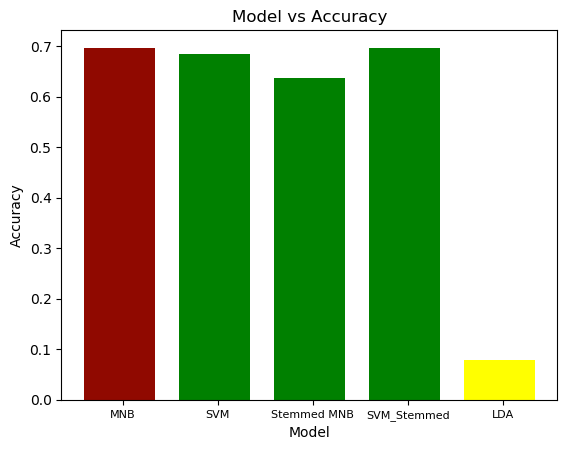

In [35]:
xticklabels = (names[1:])
# Remove the single quotes, commas and enclosing square brackets
xtlabs = names[1:]

indices = np.arange(len(names[1:]))
width = 0.75
fig = plt.figure()
col=('#900900','green','green','green','yellow')
plt.title('Model vs Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.bar(indices, accu, width,color=col)
plt.xticks(indices + width * 0.05, xtlabs, rotation='horizontal', fontsize=8)
plt.savefig('Model_Accuracy.png')
plt.show()

In [36]:
xticklabels

['MNB', 'SVM', 'Stemmed MNB', 'SVM_Stemmed', 'LDA']

In [37]:
262/len(test)

0.07830245068738792

In [38]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_data['Summary'], train_data['Component/s'])

In [39]:
len(valid_x)

20648

In [212]:
test

,Prediction_MNB,Prediction_svm,Prediction_mnb,predicted_svm_stemmed,Component/s
0,SW_NAVIGATION,SW_PARKASSIST,SW_NAVIGATION,SW_PARKASSIST,SW_AUDIO
1,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
2,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
3,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
4,SW_PHONE,SW_PHONE,SW_PHONE,SW_PHONE,SW_PHONE
5,SW_PHONE,SW_PHONE,SW_PHONE,SW_PHONE,SW_PHONE
6,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT,SW_INFOTAINMENT
7,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION
8,SW_PHONE,SW_PHONE,SW_PHONE,SW_PHONE,SW_PHONE
9,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_NAVIGATION,SW_SMARTPHONE


In [206]:
y_test.iloc[6]

'SW_INFOTAINMENT'